In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/FAANG_STOCK_NEWS.csv')

In [ ]:
df.head()

,Unnamed: 0,ticker,date,time,headline,neg,neu,pos,compound
0,0,FB,2021-09-22,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,0.000,0.608,0.392,0.7003
1,1,FB,2021-09-22,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,0.167,0.833,0.000,-0.3400
2,2,FB,2021-09-22,12:36AM,Facebook wraps up deals with Australian media ...,0.179,0.821,0.000,-0.3400
3,3,FB,2021-09-22,12:27AM,Facebook wraps up deals with Australia media f...,0.000,1.000,0.000,0.0000
4,4,FB,2021-09-21,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,0.099,0.659,0.242,0.3818


In [ ]:
df.columns

Index(['Unnamed: 0', 'ticker', 'date', 'time', 'headline', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    500 non-null    object 
 1   date      500 non-null    object 
 2   time      500 non-null    object 
 3   headline  500 non-null    object 
 4   neg       500 non-null    float64
 5   neu       500 non-null    float64
 6   pos       500 non-null    float64
 7   compound  500 non-null    float64
dtypes: float64(4), object(4)
memory usage: 31.4+ KB


In [ ]:
df.shape

(500, 8)

In [ ]:
df.columns

Index(['ticker', 'date', 'time', 'headline', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [ ]:
df.isnull().sum()

ticker      0
date        0
time        0
headline    0
neg         0
neu         0
pos         0
compound    0
dtype: int64

In [ ]:
(df.isnull().sum()/len(df))*100

ticker      0.0
date        0.0
time        0.0
headline    0.0
neg         0.0
neu         0.0
pos         0.0
compound    0.0
dtype: float64

In [ ]:
df.describe()

,neg,neu,pos,compound
count,500.000000,500.000000,500.000000,500.000000
mean,0.056344,0.822262,0.121406,0.100331
std,0.111799,0.171060,0.157284,0.346107
min,0.000000,0.306000,0.000000,-0.743000
25%,0.000000,0.706750,0.000000,0.000000
50%,0.000000,0.821000,0.000000,0.000000
75%,0.000000,1.000000,0.231000,0.307000
max,0.519000,1.000000,0.694000,0.941300


In [ ]:
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis function to the 'compound' column
df['Sentiment'] = df['compound'].apply(get_sentiment)

# Print the results
print(df[['headline', 'compound', 'Sentiment']])

                                              headline  compound Sentiment
0    2 Growth Stocks to Buy Hand Over Fist If the M...    0.7003  Positive
1    UPDATE 1-Facebook wraps up deals with Australi...   -0.3400  Negative
2    Facebook wraps up deals with Australian media ...   -0.3400  Negative
3    Facebook wraps up deals with Australia media f...    0.0000   Neutral
4    Facebook overpaid FTC fine as quid pro quo to ...    0.3818  Positive
..                                                 ...       ...       ...
495            10 Cheap Space Stocks Popular On Reddit    0.4215  Positive
496         25 Largest ETFs by Assets Under Management    0.1779  Positive
497  Startup aims to help busy moms with personal a...    0.4019  Positive
498  Tech Giants Used Loopholes to Duck Merger Revi...    0.0000   Neutral
499  Goldman Sachs on Apple: Delta variant will mak...    0.0000   Neutral

[500 rows x 3 columns]


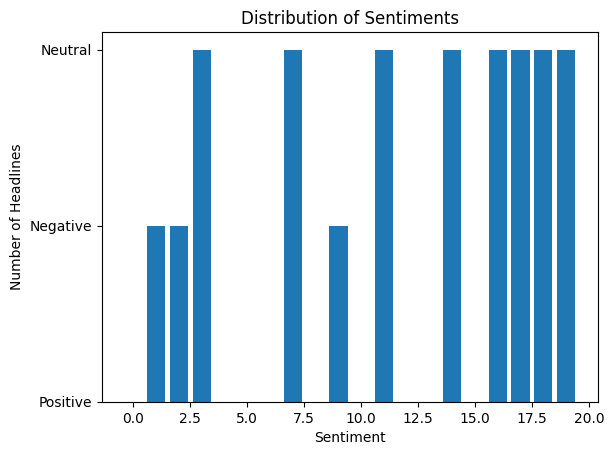

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['Sentiment'].index[0:20], df['Sentiment'].values[0:20])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.show()